# Lecture Pandas Basics

- pandas.Series
- pandas.DataFrame
- read_csv
- Indexing
- Plotting

## Pandas Series

- can create from dictionary
- can create from list
- can create from np.array

In [13]:
import pandas as pd

programs_dict = dict(AI = 26, NET = 38, Java = 30, UX = 28)

programs_series = pd.Series(programs_dict)

programs_series

AI      26
NET     38
Java    30
UX      28
dtype: int64

In [14]:
#extract values through indexing
print(f"{programs_series[0]=}")
print(f"{programs_series[1]=}")
print(f"{programs_series[-1]=}")
print(f"{programs_series['UX']=}")


#get keys
print(f"{programs_series.keys() = }")
print(f"{programs_series.keys()[0] =}")


programs_series[0]=26
programs_series[1]=38
programs_series[-1]=28
programs_series['UX']=28
programs_series.keys() = Index(['AI', 'NET', 'Java', 'UX'], dtype='object')
programs_series.keys()[0] ='AI'


In [15]:
import random as rnd

rnd.seed(1337)

dice_series = pd.Series(rnd.randint(1,6) for _ in range(10))
dice_series.head() # inspects the five first rows

0    5
1    5
2    6
3    3
4    5
dtype: int64

In [16]:
dice_series.min()

2

In [17]:
dice_series

0    5
1    5
2    6
3    3
4    5
5    5
6    6
7    2
8    3
9    4
dtype: int64

In [18]:
print(f"{dice_series.min() =}")
print(f"{dice_series.argmin() =}") #gives index for min value
print(f"{dice_series.max() =}")
print(f"{dice_series.mean() =}") # average
print(f"{dice_series.min() =}")
print(f"{dice_series.median() =}") # sort all values in irder - pick the middle one, if middle are 2 numbers calculate average of them


dice_series.min() =2
dice_series.argmin() =7
dice_series.max() =6
dice_series.mean() =4.4
dice_series.min() =2
dice_series.median() =5.0


## Data Frame
- tabular data with roews and columns
- analog to 2D numpy arrays with flexible row indices and col rows
- "specialised" dictionary with col and rows mapped to a Series object

In [22]:

# instantiated a DataFrame from a Series object
df_programs = pd.DataFrame(programs_series, columns=("Number_of_students",))
df_programs



,Number_of_students
AI,26
NET,38
Java,30
UX,28


In [23]:
#create 2 series objects
students = pd.Series({"AI": 28, "NET":38, "UX":28, "Java":27})
skills = pd.Series({"AI": "python", "NET":"C#", "UX":"figma", "Java":"JAVA"})

#create a Dataframe from 2 series objects
df_programs = pd.DataFrame({"Students": students, "Skills": skills})
df_programs

,Students,Skills
AI,28,python
NET,38,C#
UX,28,figma
Java,27,JAVA


In [24]:
df_programs["Students"]

AI      28
NET     38
UX      28
Java    27
Name: Students, dtype: int64

In [25]:
df_programs["Students"].mean()

30.25

In [26]:
median_student_number = df_programs["Students"].median()
print(f"Median students in the programs {df_programs.index.to_list()} is {median_student_number:.0f}")

Median students in the programs ['AI', 'NET', 'UX', 'Java'] is 28


In [27]:
df_programs["Skills"]

AI      python
NET         C#
UX       figma
Java      JAVA
Name: Skills, dtype: object

In [28]:
df_programs["Skills"][0], df_programs["Skills"]["AI"], df_programs["Skills"]["UX"]

('python', 'python', 'figma')

## Indexers
- loc -> slicing and indexing using explicit index
- iloc -> slicing and indexing using pything-style slicing

In [29]:
df_programs

,Students,Skills
AI,28,python
NET,38,C#
UX,28,figma
Java,27,JAVA


In [30]:
df_programs.loc["AI"]

Students        28
Skills      python
Name: AI, dtype: object

In [31]:
df_programs.loc["Java"]

Students      27
Skills      JAVA
Name: Java, dtype: object

In [32]:
df_programs.iloc[1:3]

,Students,Skills
NET,38,C#
UX,28,figma


## Masking


In [33]:
df_programs

,Students,Skills
AI,28,python
NET,38,C#
UX,28,figma
Java,27,JAVA


In [34]:
df_programs["Students"] >= 30

AI      False
NET      True
UX      False
Java    False
Name: Students, dtype: bool

In [35]:
# using masking to filter the DAtaFrame

df_programs_over_28 = df_programs[df_programs["Students"]>= 28]
df_programs_over_28

,Students,Skills
AI,28,python
NET,38,C#
UX,28,figma


## Excel data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as students


df = pd.read_excel("../Data/calories.xlsx")
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [38]:
df.shape

(2225, 5)

In [39]:
# liquid and solid foods
df["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [40]:
df["per100grams"].unique()


array(['100g', '100ml'], dtype=object)

## Data cleaning and Explorations
- type convert string object with numerical values to int
- change column names
- seperate into liquids and solids 

In [41]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [42]:
#rename colums
df = df.rename(
    dict(Cals_per100grams="Calories", KJ_per100grams="kJ", per100grams="per100"),
    axis="columns",
)

df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [43]:
#converting Calories to int
df["Calories"] =df["Calories"].str[:-3].astype(int)
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [44]:
df["Calories"].head()

0    62
1    48
2    92
3    88
4    54
Name: Calories, dtype: int32

In [45]:
# counts the frequency of each unique element
df["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [46]:
(df["per100"] == "100g").value_counts()

True     1802
False     423
Name: per100, dtype: int64

In [47]:
# separate liquids and solids
# filter out all solids
df_solids = df[df["per100"] == "100g"]

# filter out all liquids
df_liquids = df[df["per100"] == "100ml"]

df_liquids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


In [48]:
df_solids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [49]:
#check that we only have 100g in per100

df_solids["per100"].value_counts()

100g    1802
Name: per100, dtype: int64

## Assignment from stakeholder
- Find the most calory rich solid
- Find the most calory rich liquids

In [50]:
df_solids.sort_values(by="Calories")

,FoodCategory,FoodItem,per100,Calories,kJ
1816,BakingIngredients,Baking Soda,100g,0,0 kJ
2043,Herbs&Spices,Stevia,100g,0,0 kJ
2004,Herbs&Spices,Garlic Salt,100g,0,0 kJ
2040,Herbs&Spices,Sea Salt,100g,0,0 kJ
2038,Herbs&Spices,Salt,100g,0,0 kJ
...,...,...,...,...,...
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ


In [51]:
solids_sorted_calories = df_solids.sort_values(by="Calories", ascending=False)
solids_sorted_calories.iloc[:10]

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
675,Pork,Lard,100g,898,3772 kJ
1897,BakingIngredients,Vegetable Oil,100g,884,3713 kJ
1898,BakingIngredients,Vegetable Shortening,100g,884,3713 kJ
527,Beef&Veal,Beef Suet,100g,854,3587 kJ
1768,Oils&Fats,Real Butter,100g,720,3024 kJ


In [52]:
solids_top5_calories = solids_sorted_calories.head()
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [53]:
liquids_top5_calories = df_liquids.sort_values(by="Calories", ascending=False).head()
liquids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [54]:
df["FoodCategory"].value_counts()

BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Pastries,Breads&Rolls            78
Dishes&Meals                     78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Fruits                           54
Sauces&Dressings                 54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Nuts&Seeds                  

In [55]:
# top 5 food categories by calogies
top5_category_median = df.groupby("FoodCategory").median("Calories").sort_values(by="Calories", ascending=False).head().reset_index()
top5_category_median

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


In [56]:
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


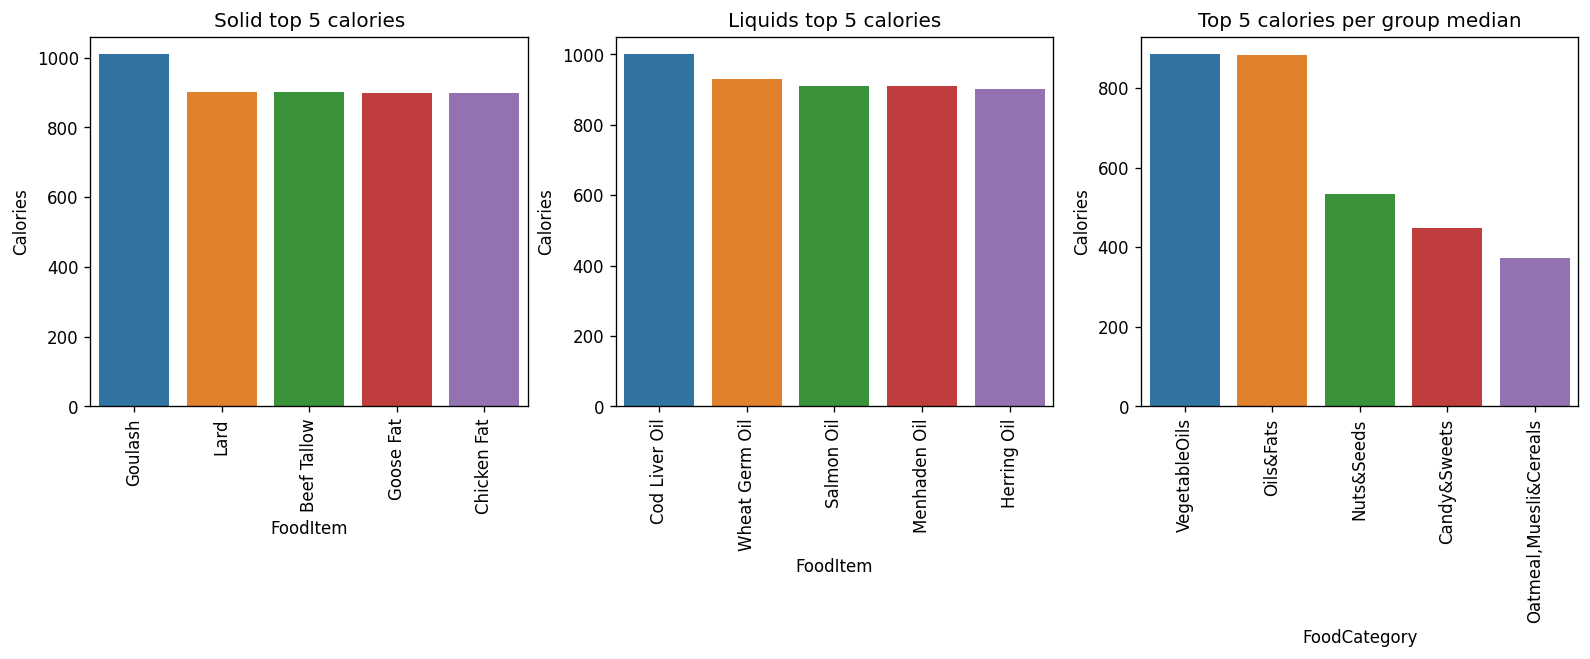

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1,3, figsize=(16,4), dpi=120)
titles = ["Solid top 5 calories", "Liquids top 5 calories", "Top 5 calories per group median"]
data_frames = (solids_top5_calories, liquids_top5_calories, top5_category_median)
x_colums = ["FoodItem","FoodItem", "FoodCategory"]

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x= x_colums[i], y="Calories", ax=axes[i])
    axes[i].set(title=title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)
    
plt.savefig("../assets/top_caloric_foods.png", facecolor="white", bbox_inches = "tight")
